In [3]:
# HER2_expression_by_iteration.ipynb

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import scipy
import matplotlib.pyplot as plt
from statannot import add_stat_annotation
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
sns.set(style="whitegrid")

In [13]:
df_cell = pd.read_csv('/Users/22holleranm/DATA_481_766_protein_networks/shared_team_files/lung_cancer.csv', index_col=0)

# Combining HER2 measurements from nuclear and cytoplasmic intensities

# Set up containers for combined HER2 intensities
combined_HER2_intensity_02 = []
combined_HER2_intensity_04 = []

# Load your data
data = df_cell  # Use the main dataset

# Define the HER2 conditions for each fluorophore/antibody, for iteration 2 and 4
conditions_02 = ['02_HER2_nuc_mean', '02_HER2_ring_mean']
conditions_04 = ['04_HER2_nuc_mean', '04_HER2_ring_mean']

# Compute combined HER2 intensities for iteration 02
for i in data.index:
    # Average nuclear and cytoplasmic HER2 measurements
    tmp = (data.loc[i, '02_HER2_nuc_mean'] + data.loc[i, '02_HER2_ring_mean']) / 2
    combined_HER2_intensity_02.append(tmp)

# Compute combined HER2 intensities for iteration 04
for i in data.index:
    tmp = (data.loc[i, '04_HER2_nuc_mean'] + data.loc[i, '04_HER2_ring_mean']) / 2
    combined_HER2_intensity_04.append(tmp)

# Add the combined HER2 intensities as new columns in the dataset
data['02_HER2_combined'] = combined_HER2_intensity_02
data['04_HER2_combined'] = combined_HER2_intensity_04

all_nuc_or_cyt = ['01_cMyc_nuc_mean', '01_BRD4_nuc_mean', '01_CDK2_nuc_mean', '02_CyclinD1_nuc_mean', 
 '03_CDC6_nuc_mean', '03_EZH2_nuc_mean', '04_cMycS62_nuc_mean', '04_FOXO1_nuc_mean', 
 '05_cMycT58_nuc_mean', '05_CyclinA_nuc_mean', '05_CyclinB1_nuc_mean', '06_FOXO3A_nuc_mean', 
 '06_ZEB1_nuc_mean', '07_pRb_S807811_nuc_mean', '07_Rb_nuc_mean', '07_p21_nuc_mean', 
 '08_CDT1_nuc_mean', '08_MDM2_nuc_mean', '09_SKP2_nuc_mean', '10_TGFbeta_nuc_mean', 
 '10_E2F1_nuc_mean', '11_cFOS_nuc_mean', '12_EZH2_nuc_mean', '12_cPARP_nuc_mean']

selection = all_nuc_or_cyt

Text(0, 0.5, 'HER2 Combined Expression for 04 Iteration')

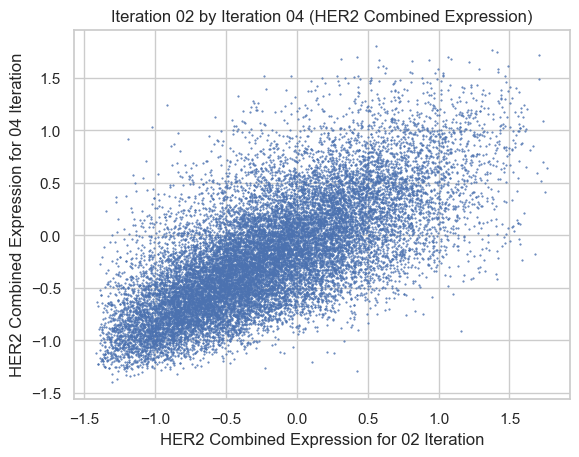

In [17]:
#Creating scatterplot to look at relationship between HER2 expression for Iteration 02 and 04 for each cell

data = df_cell
cond1 = '02_HER2_combined'  # Column representing HER2 combined expression for iteration 02
cond2 = '04_HER2_combined'  # Column representing HER2 combined expression for iteration 04

plt.scatter(data[cond1], data[cond2], s=0.25)
plt.title("Iteration 02 by Iteration 04 (HER2 Combined Expression)")
plt.xlabel("HER2 Combined Expression for 02 Iteration")
plt.ylabel("HER2 Combined Expression for 04 Iteration")